In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('data olah.csv')
data = data.drop('Unnamed: 0', axis = 1)

In [3]:
data.drop(data.columns[2410:3579], axis=1, inplace=True)
data.head(5)

,3847.6904,3848.5764,3849.4626,3850.349,3851.2358,3852.1228,3853.0098,3853.897,3854.7847,3855.6724,...,6688.059,6689.5996,6691.14,6692.6807,6694.222,6695.7637,6697.3057,6698.8477,6700.3906,wd_subclass
0,24.728888,27.64467,24.893251,27.215405,26.310278,24.307577,29.245514,29.070126,30.490877,35.01845,...,17.665596,17.521635,18.051397,17.52665,17.180534,17.99281,17.179358,17.089285,17.443895,DA
1,1290.423500,1190.24150,1224.700700,1160.337400,1100.303100,1088.031500,1152.384600,1154.704500,1115.064600,1319.14640,...,150.075820,150.250370,142.590470,143.92473,148.038850,154.53412,153.505140,149.336000,144.941860,DA
2,9819.987000,9687.30800,9957.726000,9896.959000,10370.940000,10643.110000,10709.778000,11047.445000,11019.559000,10969.06800,...,1462.006700,1473.770300,1483.637200,1470.29220,1457.449600,1450.70750,1469.381200,1475.331200,1460.837900,DA
3,1093.884500,1043.11580,1102.687500,1149.345100,1114.538500,1140.821400,1153.040000,1195.502800,1167.717200,1147.95520,...,136.972170,140.127240,140.010470,140.37068,137.124980,138.57338,135.967210,135.260400,138.557480,DA
4,1945.595200,1919.27200,1890.047000,2007.562900,1974.344600,1933.755500,2028.300500,2040.959200,2060.863300,2075.57150,...,211.261810,214.697770,217.529720,214.75264,221.029900,217.97780,217.672780,212.324870,216.794740,DA


In [4]:
#Mengubah kelas target menjadi nilai 1 (DA) dan 0 (DAZ)
dadaz = ['DA']

data['wd_subclass'] = np.where(data['wd_subclass'].isin(dadaz), 1, 0)

In [5]:
data['wd_subclass'].value_counts(normalize=True)*100

1    57.336078
0    42.663922
Name: wd_subclass, dtype: float64

# Variasi parameter

In [6]:
max_features = [25, 50, 75, 100, 125, 150]
akurasi = []

In [7]:
#Mendefinisikan fungsi untuk algoritma RF sebagai fungsi max_features 
#dan n_estimators

def model(n_estimators, max_features):
    
    from sklearn.model_selection import train_test_split
    X = data.drop('wd_subclass', axis=1)
    y = data['wd_subclass']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                        random_state=42)

    
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators = n_estimators, 
                                 max_features = max_features, 
                                 oob_score = True, class_weight = 'balanced')
    rfc.fit(X_train, y_train)
    y_pred_proba = rfc.predict_proba(X_test)[:][:,1]
    df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), 
                                                  columns=['y_actual']), 
                                     pd.DataFrame(y_pred_proba, 
                                                  columns=['y_pred_proba'])], 
                                    axis=1)
    df_actual_predicted.index = y_test.index
    
    from sklearn.metrics import roc_curve, roc_auc_score
    auc = roc_auc_score(df_actual_predicted['y_actual'], 
                        df_actual_predicted['y_pred_proba'])

    akurasi.append(auc)

In [12]:
# n = 100, 200, 300, 400, 500
for i in max_features :
    model(100,i)

In [14]:
d = {'max_features': max_features,
     'n500': akurasi[0:6],
    'n400' : akurasi[6:12],
    'n300' : akurasi[12:18],
    'n200' : akurasi[18:24],
    'n100' : akurasi[24:30]}
df = pd.DataFrame(data=d)

C:\Users\pc\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-

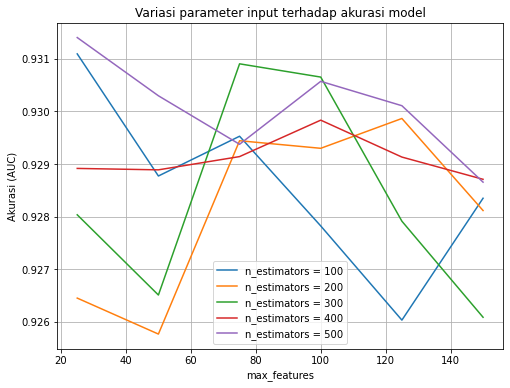

In [15]:
plt.figure(figsize=(8,6))
sns.lineplot(df.max_features, df.n100, label = 'n_estimators = 100')
sns.lineplot(df.max_features, df.n200, label = 'n_estimators = 200')
sns.lineplot(df.max_features, df.n300, label = 'n_estimators = 300')
sns.lineplot(df.max_features, df.n400, label = 'n_estimators = 400')
sns.lineplot(df.max_features, df.n500, label = 'n_estimators = 500')
plt.ylabel('Akurasi (AUC)')
plt.title('Variasi parameter input terhadap akurasi model')
plt.legend()
plt.grid()
plt.show()

# Hasil parameter

### Train-test split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = data.drop('wd_subclass', axis=1)
y = data['wd_subclass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [19]:
X_train.shape, X_test.shape

((2720, 2410), (681, 2410))

### Training

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rfc = RandomForestClassifier(n_estimators=500, max_features = 25)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=25, n_estimators=500)

In [22]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), 
                                     columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance',
                                                    ascending=False)
df_all_features

,feature,importance
48,3890.4524,0.005907
46,3888.6611,0.005626
45,3887.7659,0.005019
49,3891.3484,0.004852
47,3889.5566,0.004795
...,...,...
1257,5139.2544,0.000056
1316,5209.549,0.000056
1472,5400.079,0.000055
1181,5050.1016,0.000044


### Validation

In [23]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), 
                                              columns=['y_actual']), 
                                 pd.DataFrame(y_pred_proba, 
                                              columns=['y_pred_proba'])], 
                                axis=1)
df_actual_predicted.index = y_test.index

### AUC

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score

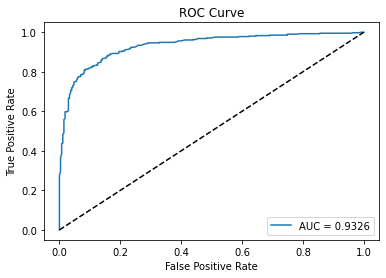

In [25]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], 
                         df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], 
                    df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [29]:
y_pred = []
for i in y_pred_proba:
    if i >= 0.5 :
        y_pred.append(1)
    elif i < 0.5 :
        y_pred.append(0)


In [98]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=[1,0], normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['DA','DAZ'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'y_test' is not defined

In [31]:
#Save data

df_all_features.to_csv('df_all_features.csv',index=False)
prediction = pd.DataFrame(y_pred_proba, columns=['predictions']).to_csv('prediction.csv',index=False)

## Ulang, bisi dapet lebih bagus

In [51]:
X = data.drop('wd_subclass', axis=1)
y = data['wd_subclass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
rfc = RandomForestClassifier(n_estimators=500, max_features = 25)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=25, n_estimators=500)

In [53]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
#df_all_features.head(30)
df_all_features

,feature,importance
45,3887.7659,0.006140
47,3889.5566,0.005556
53,3894.934,0.005352
46,3888.6611,0.005052
49,3891.3484,0.004704
...,...,...
830,4658.007,0.000065
1165,5031.531,0.000064
1181,5050.1016,0.000062
1307,5198.764,0.000050


In [54]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

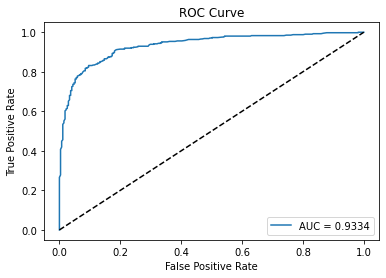

In [55]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [61]:
#Threshold = 0.5
y_pred = []
for i in y_pred_proba:
    if i >= 0.5 :
        y_pred.append(1)
    elif i < 0.5 :
        y_pred.append(0)


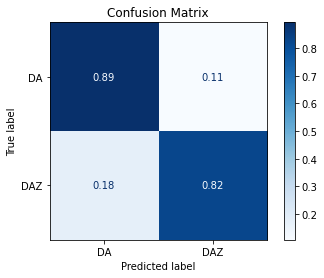

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=[1,0], normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['DA','DAZ'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [63]:
#Save data

df_all_features.to_csv('df_all_features.csv',index=False)
prediction = pd.DataFrame(y_pred_proba, columns=['predictions']).to_csv('prediction.csv',index=False)

# Feature importance

In [2]:
df_all_features = pd.read_csv('df_all_features.csv')

C:\Users\pc\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


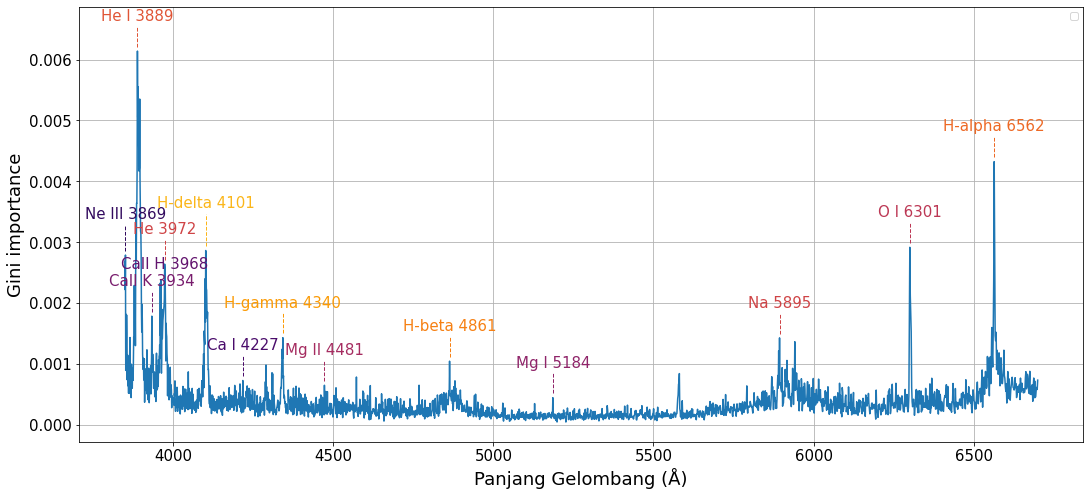

In [20]:
plt.figure(figsize = [18,8])
sns.lineplot(df_all_features.feature, df_all_features.importance)

#Annotate
plt.annotate('Ne III 3869', xy=[3850.3490, 0.002791 +  .0006],  ha = 'center', 
             color='#320a5e', size = 15)
plt.vlines(x=3850.3490, ymin=0.002791 + .00007, ymax=0.002791 + .0005, 
           colors='#320a5e', ls='--', lw=1)

plt.annotate('He I 3889', xy=[3887.7659, 0.006140 +  .0005],  ha = 'center', 
             color='#e05536', size = 15)
plt.vlines(x=3887.7659, ymin=0.006140 + .00007, ymax=0.006140 + .0004, 
           colors='#e05536', ls='--', lw=1)

plt.annotate('CaII K 3934', xy=[3932.7842, 0.001787 +  .0005],  ha = 'center', 
             color='#781c6d', size = 15)
plt.vlines(x=3932.7842, ymin=0.001787 + .00007, ymax=0.001787 + .0004, 
           colors='#781c6d', ls='--', lw=1)

plt.annotate('CaII H 3968', xy=[3971.9165, 0.002073 +  .0005],  ha = 'center', 
             color='#62146e', size = 15)
plt.vlines(x=3971.9165, ymin=0.002073 + .00007, ymax=0.002073 + .0004, 
           colors='#62146e', ls='--', lw=1)

plt.annotate('He 3972', xy=[3972.8313, 0.002643 +  .0005],  ha = 'center', 
             color='#cf4446', size = 15)
plt.vlines(x=3972.8313, ymin=0.002643 + .00007, ymax=0.002643 + .0004, 
           colors='#cf4446', ls='--', lw=1)

plt.annotate('H-delta 4101', xy=[4101.0977, 0.002865 +  .0007],  ha = 'center', 
             color='#fbb61a', size = 15)
plt.vlines(x=4101.0977, ymin=0.002865 + .00007, ymax=0.002865 + .0006, 
           colors='#fbb61a', ls='--', lw=1)

plt.annotate('Ca I 4227', xy=[4216.9663, 0.000731 +  .0005],  ha = 'center', 
             color='#4a0c6b', size = 15)
plt.vlines(x=4216.9663, ymin=0.000731 + .00007, ymax=0.000731 + .0004, 
           colors='#4a0c6b', ls='--', lw=1)

plt.annotate('H-gamma 4340', xy=[4342.1030, 0.001434 +  .0005],  ha = 'center', 
             color='#fb9b06', size = 15)
plt.vlines(x=4342.1030, ymin=0.001434 + .00007, ymax=0.001434 + .0004, 
           colors='#fb9b06', ls='--', lw=1)

plt.annotate('Mg II 4481', xy=[4471.9824, 0.000653 +  .0005],  ha = 'center', 
             color='#a52c60', size = 15)
plt.vlines(x=4471.9824, ymin=0.000653 + .00007, ymax=0.000653 + .0004, 
           colors='#a52c60', ls='--', lw=1)

plt.annotate('H-beta 4861', xy=[4862.9536, 0.001048 +  .0005],  ha = 'center', 
             color='#f68013', size = 15)
plt.vlines(x=4862.9536, ymin=0.001048 + .00007, ymax=0.001048 + .0004, 
           colors='#f68013', ls='--', lw=1)

plt.annotate('Mg I 5184', xy=[5185.6133, 0.000449 +  .0005],  ha = 'center', 
             color='#8f2469', size = 15)
plt.vlines(x=5185.6133, ymin=0.000449 + .00007, ymax=0.000449 + .0004, 
           colors='#8f2469', ls='--', lw=1)

#plt.annotate('Ca I 5580', xy=[5580.8470, 0.000845 +  .0005],  ha = 'center', 
#             color='#1b0c41', size = 14)
#plt.vlines(x=5580.8470, ymin=0.000845 + .00007, ymax=0.000845 + .0004, 
#           colors='#1b0c41', ls='--', lw=1)

plt.annotate('Na 5895', xy=[5893.8643, 0.001431 +  .0005],  ha = 'center', 
             color='#cf4446', size = 15)
plt.vlines(x=5893.8643, ymin=0.001431 + .00007, ymax=0.001431 + .0004, 
           colors='#cf4446', ls='--', lw=1)

plt.annotate('O I 6301', xy=[6300.8643, 0.002918 +  .0005],  ha = 'center', 
             color='#bc3754', size = 15)
plt.vlines(x=6300.8643, ymin=0.002918 + .00007, ymax=0.002918 + .0004, 
           colors='#bc3754', ls='--', lw=1)

plt.annotate('H-alpha 6562', xy=[6564.4766, 0.004325 +  .0005],  ha = 'center', 
             color='#ed6925', size = 15)
plt.vlines(x=6564.4766, ymin=0.004325 + .00007, ymax=0.004325 + .0004, 
           colors='#ed6925', ls='--', lw=1)


plt.ylabel('Gini importance', fontsize = 18)
plt.xlabel('Panjang Gelombang (Å)', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend()
plt.grid()
plt.show()

In [16]:
df_all_features[(df_all_features.feature>3966) & (df_all_features.feature<3972)]

,feature,importance
40,3971.9165,0.002073
43,3971.0020,0.001967
46,3970.0880,0.001895
50,3969.1738,0.001833
55,3968.2600,0.001774
58,3967.3462,0.001715
63,3966.4329,0.001568


In [40]:
df2 = df_all_features[(df_all_features.feature<4025) & (df_all_features.importance<=0.004)]

C:\Users\pc\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


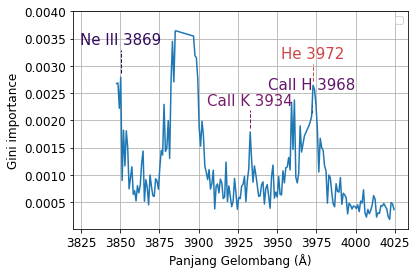

In [55]:
sns.lineplot(df2.feature, df2.importance)
plt.ylim(top = 0.004)
plt.xlim(left = 3820)

plt.annotate('Ne III 3869', xy=[3850.3490, 0.002791 +  .0006],  ha = 'center', 
             color='#320a5e', size = 15)
plt.vlines(x=3850.3490, ymin=0.002791 + .00007, ymax=0.002791 + .0005, 
           colors='#320a5e', ls='--', lw=1)

plt.annotate('He I 3889', xy=[3887.7659, 0.006140 +  .0005],  ha = 'center', 
             color='#e05536', size = 15)
plt.vlines(x=3887.7659, ymin=0.006140 + .00007, ymax=0.006140 + .0004, 
           colors='#e05536', ls='--', lw=1)

plt.annotate('CaII K 3934', xy=[3932.7842, 0.001787 +  .0005],  ha = 'center', 
             color='#781c6d', size = 15)
plt.vlines(x=3932.7842, ymin=0.001787 + .00007, ymax=0.001787 + .0004, 
           colors='#781c6d', ls='--', lw=1)

plt.annotate('CaII H 3968', xy=[3971.9165, 0.002073 +  .0005],  ha = 'center', 
             color='#62146e', size = 15)
plt.vlines(x=3971.9165, ymin=0.002073 + .00007, ymax=0.002073 + .0004, 
           colors='#62146e', ls='--', lw=1)

plt.annotate('He 3972', xy=[3972.8313, 0.002643 +  .0005],  ha = 'center', 
             color='#cf4446', size = 15)
plt.vlines(x=3972.8313, ymin=0.002643 + .00007, ymax=0.002643 + .0004, 
           colors='#cf4446', ls='--', lw=1)

plt.ylabel('Gini importance', fontsize = 12)
plt.xlabel('Panjang Gelombang (Å)', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()
plt.grid()
plt.show()

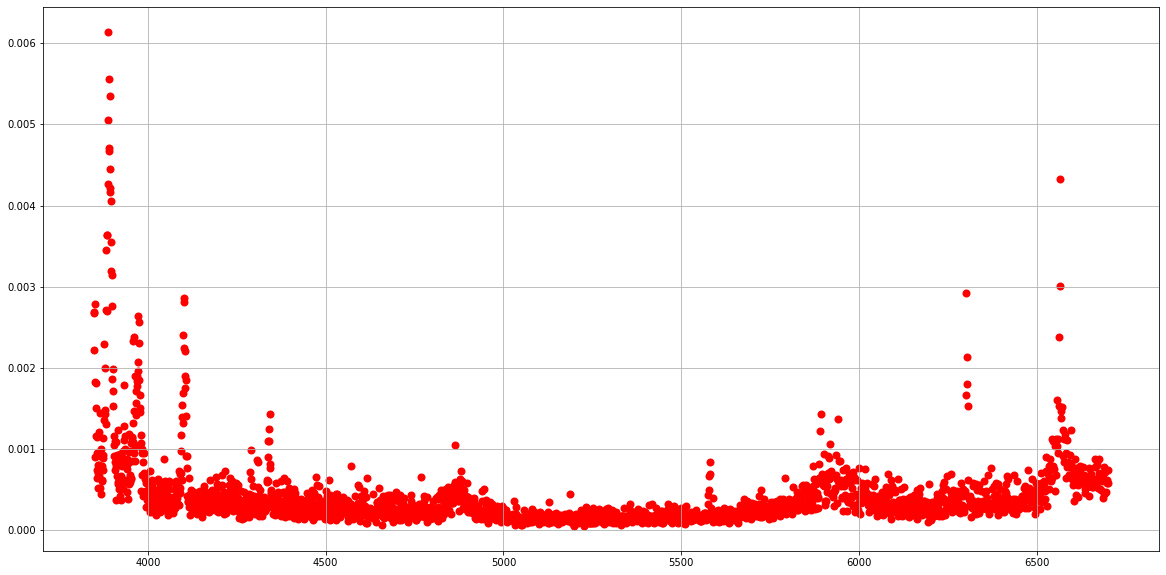

In [53]:
fig, ax1       = plt.subplots(figsize=[20,10])
ax1.scatter(df_all_features.feature, df_all_features.importance, linewidth = 2, color='red')
ax1.grid()

C:\Users\pc\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


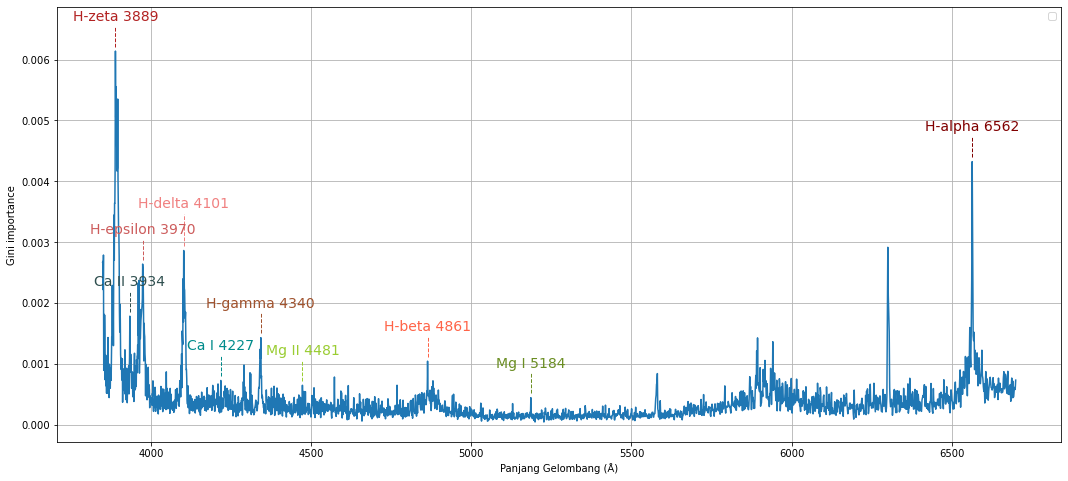

In [27]:
plt.figure(figsize = [18,8])
sns.lineplot(df_all_features.feature, df_all_features.importance)

#Abundance
#plt.xticks([3889, 3934, 3970, 4101, 4227, 4340, 4481, 4861, 5184, 6562])
#xLabels = (3889, 3933.7, 3970, 4101, 4227, 4340, 4481, 4861, 5184, 6562)
#plt.xticks(xLabels, rotation=90)

plt.vlines(x=3887.7659, ymin=0.006140 + .00007, ymax=0.006140 + .0004, colors='firebrick', ls='--', lw=1)
plt.vlines(x=3932.7842, ymin=0.001787 + .00007, ymax=0.001787 + .0004, colors='darkslategray', ls='--', lw=1)
plt.vlines(x=3972.8313, ymin=0.002643 + .00007, ymax=0.002643 + .0004, colors='indianred', ls='--', lw=1)
plt.vlines(x=4101.0977, ymin=0.002865 + .00007, ymax=0.002865 + .0006, colors='lightcoral', ls='--', lw=1)
plt.vlines(x=4216.9663, ymin=0.000731 + .00007, ymax=0.000731 + .0004, colors='darkcyan', ls='--', lw=1)
plt.vlines(x=4342.1030, ymin=0.001434 + .00007, ymax=0.001434 + .0004, colors='sienna', ls='--', lw=1)
plt.vlines(x=4471.9824, ymin=0.000653 + .00007, ymax=0.000653 + .0004, colors='yellowgreen', ls='--', lw=1)
plt.vlines(x=4862.9536, ymin=0.001048 + .00007, ymax=0.001048 + .0004, colors='tomato', ls='--', lw=1)
plt.vlines(x=5185.6133, ymin=0.000449 + .00007, ymax=0.000449 + .0004, colors='olivedrab', ls='--', lw=1)
plt.vlines(x=6564.4766, ymin=0.004325 + .00007, ymax=0.004325 + .0004, colors='maroon', ls='--', lw=1)


#Annotate
#plt.annotate('Fe I 3581', xy=[3889.5566, df_all_features[df_all_features.feature == 3889.5566] +  .00025],  rotation=-90, color='purple')
plt.annotate('H-zeta 3889', xy=[3887.7659, 0.006140 +  .0005],  ha = 'center', color='firebrick', size = 14)
plt.annotate('Ca II 3934', xy=[3932.7842, 0.001787 +  .0005],  ha = 'center', color='darkslategray', size = 14)
plt.annotate('H-epsilon 3970', xy=[3972.8313, 0.002643 +  .0005],  ha = 'center', color='indianred', size = 14)
plt.annotate('H-delta 4101', xy=[4101.0977, 0.002865 +  .0007],  ha = 'center', color='lightcoral', size = 14)
plt.annotate('Ca I 4227', xy=[4216.9663, 0.000731 +  .0005],  ha = 'center', color='darkcyan', size = 14)
plt.annotate('H-gamma 4340', xy=[4342.1030, 0.001434 +  .0005],  ha = 'center', color='sienna', size = 14)
plt.annotate('Mg II 4481', xy=[4471.9824, 0.000653 +  .0005],  ha = 'center', color='yellowgreen', size = 14)
plt.annotate('H-beta 4861', xy=[4862.9536, 0.001048 +  .0005],  ha = 'center', color='tomato', size = 14)
plt.annotate('Mg I 5184', xy=[5185.6133, 0.000449 +  .0005],  ha = 'center', color='olivedrab', size = 14)
plt.annotate('H-alpha 6562', xy=[6564.4766, 0.004325 +  .0005],  ha = 'center', color='maroon', size = 14)

plt.ylabel('Gini importance')
plt.xlabel('Panjang Gelombang (Å)')
#plt.title('Variasi parameter input terhadap akurasi model')
plt.legend()
plt.grid()
plt.show()

In [4]:
df_all_features[(df_all_features.feature>6220) & (df_all_features.feature<6380)]

,feature,importance
19,6300.8643,0.002918
39,6302.3150,0.002128
53,6303.7666,0.001803
61,6299.4136,0.001663
65,6305.2183,0.001531
...,...,...
1788,6230.1730,0.000193
1836,6240.2230,0.000187
1916,6225.8710,0.000178
1963,6233.0430,0.000170


In [92]:
palette = sns.color_palette("inferno", 17).as_hex()

In [93]:
print(palette)

['#09061f', '#1b0c41', '#320a5e', '#4a0c6b', '#62146e', '#781c6d', '#8f2469', '#a52c60', '#bc3754', '#cf4446', '#e05536', '#ed6925', '#f68013', '#fb9b06', '#fbb61a', '#f7d13d', '#f1ec6d']


In [94]:
palette

['#09061f',
 '#1b0c41',
 '#320a5e',
 '#4a0c6b',
 '#62146e',
 '#781c6d',
 '#8f2469',
 '#a52c60',
 '#bc3754',
 '#cf4446',
 '#e05536',
 '#ed6925',
 '#f68013',
 '#fb9b06',
 '#fbb61a',
 '#f7d13d',
 '#f1ec6d']

C:\Users\pc\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


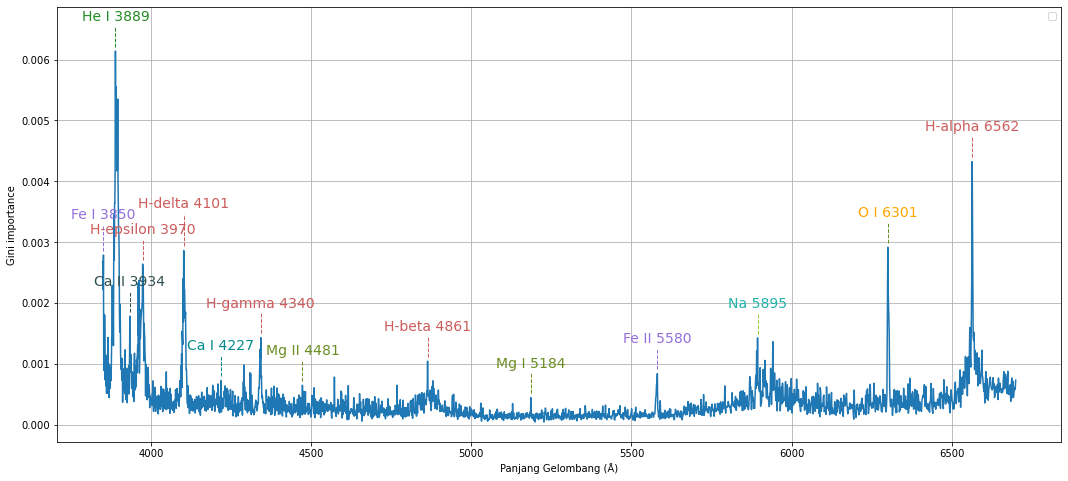

In [80]:
plt.figure(figsize = [18,8])
sns.lineplot(df_all_features.feature, df_all_features.importance)

#Abundance
#plt.xticks([3889, 3934, 3970, 4101, 4227, 4340, 4481, 4861, 5184, 6562])
#xLabels = (3889, 3933.7, 3970, 4101, 4227, 4340, 4481, 4861, 5184, 6562)
#plt.xticks(xLabels, rotation=90)

plt.vlines(x=3850.3490, ymin=0.002791 + .00007, ymax=0.002791 + .0005, colors='mediumpurple', ls='--', lw=1)
plt.vlines(x=3887.7659, ymin=0.006140 + .00007, ymax=0.006140 + .0004, colors='forestgreen', ls='--', lw=1)
plt.vlines(x=3932.7842, ymin=0.001787 + .00007, ymax=0.001787 + .0004, colors='darkslategray', ls='--', lw=1)
plt.vlines(x=3972.8313, ymin=0.002643 + .00007, ymax=0.002643 + .0004, colors='indianred', ls='--', lw=1)
plt.vlines(x=4101.0977, ymin=0.002865 + .00007, ymax=0.002865 + .0006, colors='indianred', ls='--', lw=1)
plt.vlines(x=4216.9663, ymin=0.000731 + .00007, ymax=0.000731 + .0004, colors='darkcyan', ls='--', lw=1)
plt.vlines(x=4342.1030, ymin=0.001434 + .00007, ymax=0.001434 + .0004, colors='indianred', ls='--', lw=1)
plt.vlines(x=4471.9824, ymin=0.000653 + .00007, ymax=0.000653 + .0004, colors='olivedrab', ls='--', lw=1)
plt.vlines(x=4862.9536, ymin=0.001048 + .00007, ymax=0.001048 + .0004, colors='indianred', ls='--', lw=1)
plt.vlines(x=5185.6133, ymin=0.000449 + .00007, ymax=0.000449 + .0004, colors='olivedrab', ls='--', lw=1)
plt.vlines(x=5580.8470, ymin=0.000845 + .00007, ymax=0.000845 + .0004, colors='mediumpurple', ls='--', lw=1)
plt.vlines(x=5893.8643, ymin=0.001431 + .00007, ymax=0.001431 + .0004, colors='yellowgreen', ls='--', lw=1)
plt.vlines(x=6300.8643, ymin=0.002918 + .00007, ymax=0.002918 + .0004, colors='olivedrab', ls='--', lw=1)
plt.vlines(x=6564.4766, ymin=0.004325 + .00007, ymax=0.004325 + .0004, colors='indianred', ls='--', lw=1)


#Annotate
plt.annotate('Ne III 3850', xy=[3850.3490, 0.002791 +  .0006],  ha = 'center', color='mediumpurple', size = 14)
plt.annotate('He I 3889', xy=[3887.7659, 0.006140 +  .0005],  ha = 'center', color='forestgreen', size = 14)
plt.annotate('Ca II 3934', xy=[3932.7842, 0.001787 +  .0005],  ha = 'center', color='darkslategray', size = 14)
plt.annotate('H-epsilon 3970', xy=[3972.8313, 0.002643 +  .0005],  ha = 'center', color='indianred', size = 14)
plt.annotate('H-delta 4101', xy=[4101.0977, 0.002865 +  .0007],  ha = 'center', color='indianred', size = 14)
plt.annotate('Ca I 4227', xy=[4216.9663, 0.000731 +  .0005],  ha = 'center', color='darkcyan', size = 14)
plt.annotate('H-gamma 4340', xy=[4342.1030, 0.001434 +  .0005],  ha = 'center', color='indianred', size = 14)
plt.annotate('Mg II 4481', xy=[4471.9824, 0.000653 +  .0005],  ha = 'center', color='olivedrab', size = 14)
plt.annotate('H-beta 4861', xy=[4862.9536, 0.001048 +  .0005],  ha = 'center', color='indianred', size = 14)
plt.annotate('Mg I 5184', xy=[5185.6133, 0.000449 +  .0005],  ha = 'center', color='olivedrab', size = 14)
plt.annotate('Fe II 5580', xy=[5580.8470, 0.000845 +  .0005],  ha = 'center', color='mediumpurple', size = 14)
plt.annotate('Na 5895', xy=[5893.8643, 0.001431 +  .0005],  ha = 'center', color='lightseagreen', size = 14)
plt.annotate('O I 6301', xy=[6300.8643, 0.002918 +  .0005],  ha = 'center', color='orange', size = 14)
plt.annotate('H-alpha 6562', xy=[6564.4766, 0.004325 +  .0005],  ha = 'center', color='indianred', size = 14)

plt.ylabel('Gini importance')
plt.xlabel('Panjang Gelombang (Å)')
#plt.title('Variasi parameter input terhadap akurasi model')
plt.legend()
plt.grid()
plt.show()

In [37]:
df_all_features[(df_all_features.feature>5500) & (df_all_features.feature<5700)]

,feature,importance
173,5580.8470,0.000845
243,5579.5620,0.000696
269,5578.2773,0.000666
511,5576.9930,0.000490
636,5575.7090,0.000435
...,...,...
2362,5588.5625,0.000096
2388,5633.7827,0.000087
2394,5658.4844,0.000085
2396,5504.2750,0.000083
